# Introduction to Mathematical Finance

## The time value of money

When you put money into a bank, it offer you an interest rate of $5\%$. 
So $100 becomes $105 in one year, and more interest will be added the year after.

| Year | 0 | 1 | 2 | 3 | 4 | 5 |
|------|---|---|---|---|---|---|
| Interest rate | 5% | 5% | 5% | 5% | 5% | 5% |
| Principal from last year | $100$ | $105$ | $110.25$ | $115.76$ | $121.55$ | $127.63$ |
| Interest from last to this year | $0$ | $5$ | $5.25$ | $5.51$ | $5.78$ | $6.07$ |
| Fund value| $100$ | $105$ | $110.25$ | $115.76$ | $121.55$ | $127.63$ |


In [53]:
import pandas as pd

def plotFundValue(principal, interestRate, investmentTime, returnSeries=False, plot=True):
    
    fundValue = pd.Series(range(investmentTime + 1))

    fundValue.name = 'Fund Value'
    fundValue.index.name = 'Year'

    fundValue[0] = principal

    for i in range(investmentTime):
        fundValue[i + 1] = fundValue[i] * (1 + interestRate)

    if plot:
        fundValue.plot(title = 'Fund Value Over Time', grid = True, legend = True, style='--o')

    if returnSeries:
        return fundValue
    else:
        return None
    
def plotLemonade(principal, interestRate, profitRate, investmentTime):

    fundValues = pd.DataFrame(columns=['Bank Account', 'Lemonade Stand'])
    
    fundValues['Bank Account'] = plotFundValue(principal, interestRate, investmentTime, returnSeries=True, plot=False)
    fundValues['Lemonade Stand'] = plotFundValue(principal, profitRate, investmentTime, returnSeries=True, plot=False)

    fundValues.plot(title = 'Fund Value Over Time', grid = True, legend = True, style='--o')
    
    return None

def plotBank(principal, interestRate, profitRate, investmentTime):

    fundValues = pd.DataFrame(columns=['Bank Account', 'Lemonade Stand', 'Bank Profit'])
    
    fundValues['Bank Account'] = plotFundValue(principal, interestRate, investmentTime, returnSeries=True, plot=False)
    fundValues['Lemonade Stand'] = plotFundValue(principal, profitRate, investmentTime, returnSeries=True, plot=False)
    fundValues['Bank Profit'] = fundValues['Lemonade Stand'] - fundValues['Bank Account']

    fundValues.plot(title = 'Fund Value Over Time', grid = True, legend = True, style='--o')
    
    return None

def compareTwoOptions(totalAmount, discount, investmentTime, interestRate):
    
    # First option
    cashAtYear0_1stOption = totalAmount * (1 - discount)

    # Second option
    paymentPerYear_2ndOption = totalAmount / investmentTime
    cashAtYears_2ndOption = [paymentPerYear_2ndOption] * investmentTime

    cashAtYear0_2ndOption = 0

    for i in range(investmentTime):    

        timeFromYear0 = i

        equivalentCashAtYear0_yeari = cashAtYears_2ndOption[i] / (1 + interestRate) ** timeFromYear0

        cashAtYear0_2ndOption += equivalentCashAtYear0_yeari

    print('First option is paying:', cashAtYear0_1stOption, 'at time 0. \nSecond option is equivalent of paying:', cashAtYear0_2ndOption, 'at time 0. \nSo the', 'first' if cashAtYear0_1stOption < cashAtYear0_2ndOption else 'second', 'option is better')

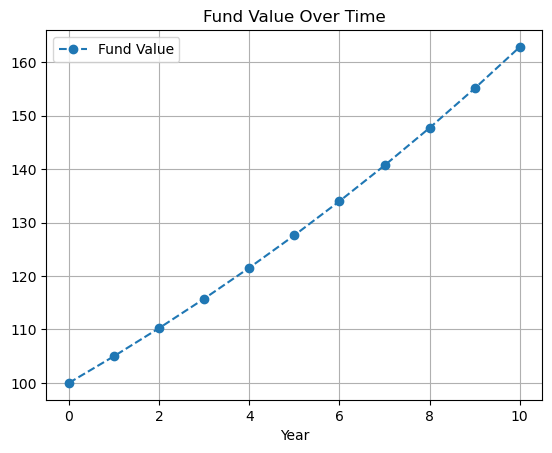

In [54]:
principal = 100
interestRate = 0.05
investmentTime = 10
returnSeries = False

plotFundValue(principal, interestRate, investmentTime, returnSeries)

It may never naturally occur to one that money grows through time. 
How do we make sense of that?

### Interest rate from your perspective (viewpoint)
When you put $100 into a bank, the bank has your money for a period of time, which means you cannot use it for the period.

If you didn't do it in the first place, you could have used the money to do some business and make some profit.

For example, you could have used the money to buy sugar and lemon, and sell lemonade on the street.
We all know sugar and lemon are cheap, and lemonade is more expensive. 

So if you are lucky (majority the lemonade is sold out), you can make a profit, which is likely to be more than the interest you get from the bank.

Let's assume you can make a profit of $10$ dollars in one year.

Then, the interest rate from your perspective is $10\%$.

Then, here comes the question: why should you put the money into the bank?

The answer is: you put the money into the bank because you don't want to take the **risk** of doing business.

You don't want to take the risk of not being able to sell the lemonade, or the risk of being robbed on the street.

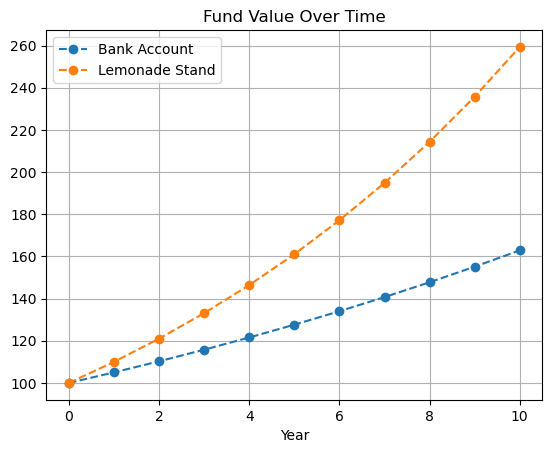

In [55]:
principal = 100
interestRate = 0.05
investmentTime = 10
profitRate = 0.1

plotLemonade(principal, interestRate, profitRate, investmentTime)

### Interest rate from a bank's perspective 

When you put money into a bank, it is the same as the bank borrows money from you.
The bank will pay you an interest rate for the money you lend to it.

The interest rate is the price of money.

After you make the deposit, the bank will use the money to make loans to other people at a higher interest rate.
Or, the bank will use the money to do some business themselves!

Oh! We are paying the bank to do business with our money! And some of the money they make is used to pay us back!

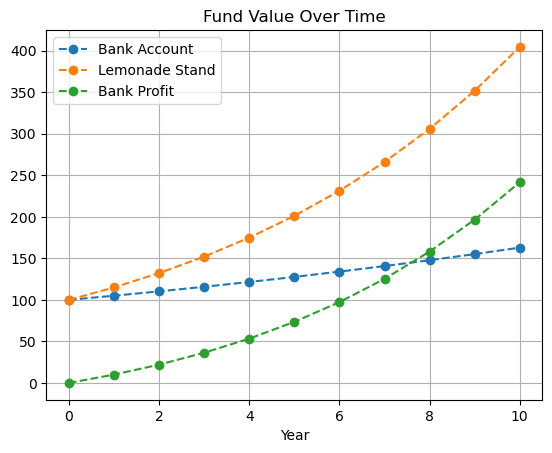

In [56]:
principal = 100
interestRate = 0.05
investmentTime = 10
profitRate = 0.15

plotBank(principal, interestRate, profitRate, investmentTime)

### Conclusion

So the money does not grow by itself. 

It is growing because it is used to do business, and the business makes money.

It takes time for the business to make money, so the money grows through time.

Banking itself is a business too!

### Question

If you have the option of getting \$100 today and put it into the bank, or getting \$100 in one year, which one would you choose?

If you have the option of getting \$100 today, or \$100 in one year, which one would you choose?

How much is \$100 today worth in one year?

How much is \$105 in one year worth today? 

How should you compare the value of money when they are in different time?

**How should you decide between two options when the cash flow (money) is paid in different time?**

### Answer

**For each options, we should move all the cash flow to the same time, and then compare which is better.**

In [57]:
totalAmount = 1000
discount = 0.1
investmentTime = 10
interestRate = 0.05

compareTwoOptions(totalAmount, discount, investmentTime, interestRate)

First option is paying: 900.0 at time 0. 
Second option is equivalent of paying: 810.7821675644052 at time 0. 
So the second option is better
